# Description

This demo will use PyTorch to convert Celsius (C) to Fahrenheit (F). The following formula is being used to perform the conversion.

_F = C * 1.8 + 32_

Usually in a **regular programing** we will implement a function to apply the previous formula. So give an input that represent the Celsius (C), the function will perform the below arithmetic operation:

In [ ]:
# Regular programing
def function(C):
    F = C * 1.8 + 32
    return F

In an **machine learning (ML)** we dont't know the formula to be applied. We only have some inputs and outputs data. So, given this information, on AI and in specific ML will learn the necesary algorithmic based on a model for the given inputs and outputs.

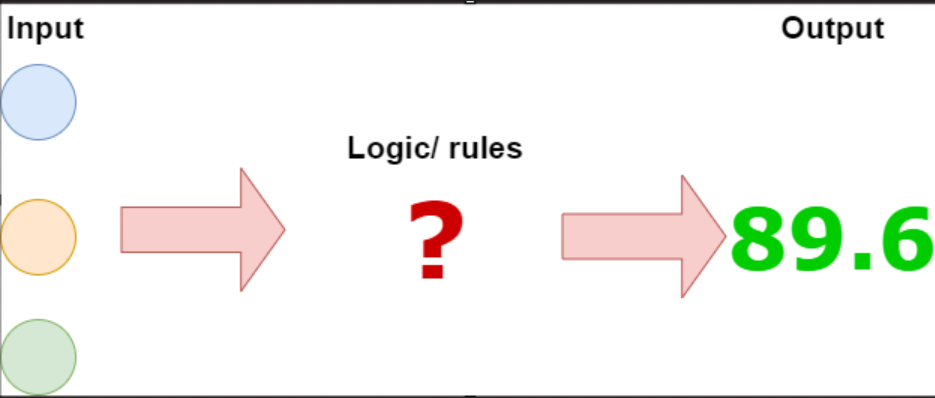

### Step 1. Import the libraries
Install the Tensorflow library (you might need to install it as administrator).

In [ ]:
pip install torch numpy

Import the libraries

In [ ]:
import torch
import torch.nn as nn
import numpy as np

### Step 2. Define the Model

We create a simple linear model with one input and one output using **nn.Linear(1, 1)**.
This represents the relationship:

```
Fahrenheit = 𝑎 × Celsius + 𝑏
```

where _b_ are learned parameters.

In [ ]:
# Define a simple neural network model
class CelsiusToFahrenheitModel(nn.Module):
    def __init__(self):
        super(CelsiusToFahrenheitModel, self).__init__()
        # Define a linear layer with one input and one output
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

### Step 3. Training the Model

We use the Mean Squared Error (MSE) loss function and Stochastic Gradient Descent (SGD) optimizer.
The model is trained over a specified number of epochs [<sup id="fn1-back">1</sup>](#fn1 "What is epoch in PyTorch?"), adjusting its parameters to minimize the loss.

For this, we created a function that will be in charge to execute the training:

[<sup id="fn1">1</sup>](#fn1-back) Training of a neural network model is in epochs. Usually, one epoch means you run through the entire training set once, although you only feed one batch at a time.


In [ ]:
# Function to train the model
def train_model(model, inputs, targets, learning_rate=0.001, epochs=1000):
    # Define a loss function (Mean Squared Error)
    criterion = nn.MSELoss()
    # Define an optimizer (Stochastic Gradient Descent)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    # Training loop
    for epoch in range(epochs):
        # Set the model to training mode
        model.train() 
        
        # Forward pass: Compute predicted y by passing x to the model
        predictions = model(inputs)
        # Compute the loss
        loss = criterion(predictions, targets)
        
        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print the loss every 100 epochs
        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}')
            # Print out the current parameters of the model
            for name, param in model.named_parameters():
                print(f"{name}: {param.data}")

        # Check for NaN in loss and exit if encountered
        if torch.isnan(loss):
            print(f"NaN encountered in epoch {epoch+1}. Stopping training.")
            break

    print("Training complete!")
    return model

### Step 4. Create the Function to perform the conversion

After training, we use the model to convert new Celsius values to Fahrenheit.

In [ ]:
# Function to convert Celsius to Fahrenheit using the trained model
def celsius_to_fahrenheit(celsius_values, model):
    # Convert the input to a PyTorch tensor and reshape it
    celsius_tensor = torch.tensor(celsius_values, dtype=torch.float32).reshape(-1, 1)
    # Predict Fahrenheit values
    with torch.no_grad():  # No need to compute gradients for inference
        fahrenheit_tensor = model(celsius_tensor)
    return fahrenheit_tensor

### Step 5. Example Usage

We provide sample data for training and then use the trained model to convert new Celsius values. This approach uses PyTorch to handle the training and prediction, demonstrating how even simple tasks can be framed as learning problems for educational purposes.

In [ ]:
# Example usage
# Training data: Celsius to Fahrenheit pairs
celsius_samples = np.array([0, 10, 20, 30, 40, 100], dtype=np.float32)
fahrenheit_samples = np.array([32, 50, 68, 86, 104, 212], dtype=np.float32)

# Convert the training data to PyTorch tensors
inputs = torch.tensor(celsius_samples).reshape(-1, 1)  # Reshape to (n_samples, 1)
targets = torch.tensor(fahrenheit_samples).reshape(-1, 1)  # Reshape to (n_samples, 1)

# Initialize the model
model = CelsiusToFahrenheitModel()

# Train the model
trained_model = train_model(model, inputs, targets, learning_rate=0.001)  # Reduced learning rate

# Convert new Celsius values using the trained model
new_celsius_values = [0, 20, 100, -40]  # List of new Celsius values to convert
fahrenheit_values = celsius_to_fahrenheit(new_celsius_values, trained_model)

print("Celsius values:", new_celsius_values)
print("Converted Fahrenheit values:", fahrenheit_values.numpy().flatten())  # Converting tensor to NumPy array for easy reading

After running the above code, you should see the following graph. Compare to the TensorFlow code, it seems that at 950 - 1000 range the model already found the alghorithm to convert Celsius to Fahrenheit.

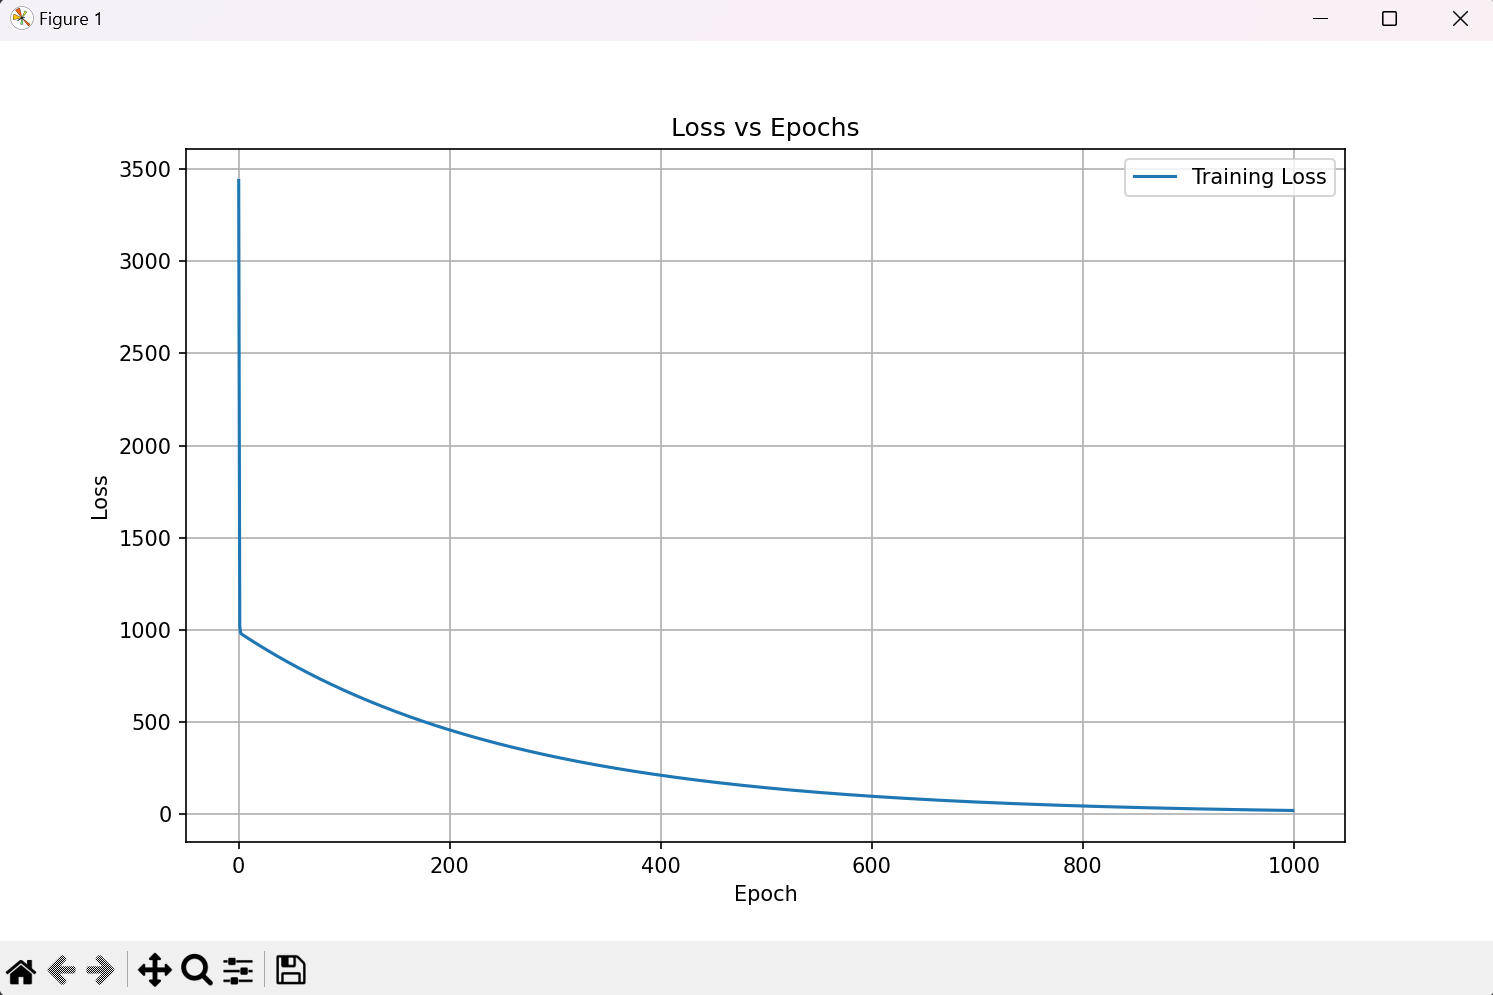

# Conclusion

As you followed up this demo, you saw one of many use cases and the potential of Tensorflow on Machine Learning (ML). The demo use PyTorch to trian the model based on some input and output data using a single layer that gave us a close result. In case we want to improve the accuracy of the result we can add more layers to our model. Just keep in mind that the improvement might be small in some cases.